# **Predicting Passenger Survivor**
****

**Table content**
* **About Data**
* **Import Libraries**
* **load Datasets**
* **Explorer Datasets**
* **Data Split**
* **Data Cleaning**
* **Data Visualization**
* **Choose Model**
* **Fit Models**
* **Evaluate Model**
* **Fine The Model**

## **About Data**
RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg. for more info click <a href='https://en.wikipedia.org/wiki/Titanic' style='text-decoration:none'>here</a>

<pre style="font-family: 'Brush Script MT', cursive, serif;">
<h3 style='font-size: 12'>Defination Of Feature Columns</h3>
<b>Survived:</b> Passager Survived
0 = No
1 = Yes
<b>Embarked:</b> Port of Embarkation
C = Cherbourg
Q = Queenstown
S = Southampton
<b>Pclass:</b> ticket class
A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
<b>Sex:</b> passenger sex
<b>Age:</b> Age in years
Age is fractional if less than 1.
If the age is estimated, is it in the form of xx.5
<b>Sibsp:</b> of siblings / spouses aboard the Titanic
The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
<b>Parch:</b> of parents / children aboard the Titanic.
The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
<b>Ticket:</b> ticket number
<b>Fare:</b> fare paid for a ticket
<b>cabin:</b> Cabin number
</pre>

## **Import Libraries**
---

In [1]:
import os, warnings
from typing import List, Tuple, Callable, Union
# Data manipulation tools
import numpy as np
import pandas as pd
import missingno as mno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder

# Data split into train and validation
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    GridSearchCV,
    GroupKFold,
    RandomizedSearchCV)

# Data Imputation tool
from sklearn.impute import KNNImputer, SimpleImputer, MissingIndicator

# Machine learning model
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier,
    )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

# Model evalution tools
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix, f1_score,
    auc,
    recall_score
    )

## **Setting Notebook**
---

In [2]:
plt.rc("figure", autolayout=True, figsize=(5, 6))
plt.rc("axes", titlesize=12, titleweight=30, labelsize=10, labelweight=20)

# Set the reproducibility
def set_seed(seed: int) -> None:
    """
    Sets the seed for reproducibilty
    @param: seed
    @return: None
    """
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = '-1'


set_seed(0)


## **Load Datasets**
---

In [3]:
def load_data(train_path: str, test_path: str, index_col: str=None) -> Tuple[pd.DataFrame]:
    """
    Loads data path into pandas dataframe and return a
    list of dataframe
    Args:
        train_path (str): train data path to load in the pandas dataframe
        test_path (str): test data path to load in the pandas dataframe
        index_col (str, optional): column name to use as index column. Defaults to None.

    Returns:
        Tuple[pd.DataFrame]: Two dataframe in the tuple
    """
    # Instantiate the train dataframe
    train_df = pd.read_csv(train_path, index_col=index_col)

    # Instantiate the test dataframe
    test_df = pd.read_csv(test_path, index_col=index_col)

    return train_df, test_df

In [4]:
try:
    # trying to use this local path
    local_train_path = "../datasets/train.csv"
    local_test_path = "../datasets/test.csv"
    # Initialize the list of dataset to: datasets
    datasets = load_data(local_train_path, local_test_path, "PassengerId")

    # Assign train and test dataframe
    train_df, test_df = datasets

except:
    from google.colab import drive
    drive.mount('/content/drive')

    drive_train_path = "./drive/MyDrive/Datasets/titanic_data/train.csv"
    drive_test_path = "./drive/MyDrive/Datasets/titanic_data/test.csv"


    # Initialize the list of dataset to: datasets
    datasets = load_data(drive_train_path, drive_test_path, "PassengerId")

    # Assign train and test dataframe
    train_df, test_df = datasets

Mounted at /content/drive


## **Explorer Datasets**
---

### **Train And Test Dataframe**

#### **Train**

In [5]:
# Check out the first five row in train dataframe
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Test**

In [6]:
# And Five from test dataframe
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Data Information**

#### **Train**

In [7]:
# View the data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
# columns names in the data
columns = train_df.columns
columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### **Test**

In [9]:
# View the data information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### **Data Description**

#### **Train**

In [10]:
# Data summary analysis
train_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Test**

In [11]:
# Data summary analysis
test_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,418,3,S,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Preprocessing**
---

Construct a test model for testing the change in data

In [12]:
def test_model(
    column: str,
    train_X: pd.DataFrame,
    train_y: pd.Series,
    valid_X: pd.DataFrame,
    valid_y: pd.Series,
    method_name: str = None
    ) -> None:
    """
    Test changes made on column.
    # Parameters

    columns: A column to change values from
    train_X: A DataFrame to train the model
    train_y: A Series with outcome values
    valid_X: A DataFrame to test the model
    valid_y: A Series with outcome values for testing the model
    method_name: A name of the method used to change the
    data column, default = None

    # Return

    None
    """
    # Instantiate the model.
    model = RandomForestClassifier()

    # Fit the model with the training data.
    model.fit(train_X[[column]], train_y)

    # Model train score
    train_score = model.score(train_X[[column]], train_y)

    # Test score
    test_score = model.score(valid_X[[column]], valid_y)

    if method_name:
        print("\033[1m%s \033[0m" % method_name)
    print("train_score: %.2f \nvalid score: %.2f" % (train_score, test_score))
    print()

### **Split Data**

*Seperate predictive feature from the target variable*

In [13]:
X = train_df.drop("Survived", axis="columns")
y = train_df["Survived"]

In [14]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (891, 10)
y shape: (891,)


*Split dataset into train and validation dataset*

In [15]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=.80)

In [16]:
print(f"train_X shape: {train_X.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"valid_X shape: {valid_X.shape}")
print(f"valid_y shape: {valid_y.shape}")

train_X shape: (712, 10)
train_y shape: (712,)
valid_X shape: (179, 10)
valid_y shape: (179,)


### **Data Cleaning**

In [17]:
def fill_na(
    column: str,
    data: pd.DataFrame,
    method: any) -> pd.DataFrame:
    """
    Fill NaN (missing values) in the given column
    in the data

    # Parameters

    columns (str): column name which can be find in the data
    data (pd.DataFrame): Dataframe to get the column from
    method (str|Callables): Fill the missing values with int,
        float, and callable function like np.mean, np.meaian etc

    # Returns

    DataFrame (pd.DataFrame): A Dataframe without missing value in the
        given column

    """
    if callable(method):
        return data.fillna({column: method(data[column], axis=0)})
    else:
        return data.fillna({column: method})

#### **Checking For Missing Value(NaN)**

In [18]:
def check_nan(data: pd.DataFrame) -> pd.DataFrame:
    """
    Check missing values or NaN in
    the data

    # Parameters

    data (pd.DataFrame): To check if there is missing values

    # Returns

    pd.DataFrame: with column, count
    and percentage of missing values
    """
    # Get the sum of missing values in each column
    total_nan = data.isna().sum()

    # Percent of missing values in each column
    percent = (total_nan / data.shape[0]).round(3)

    # Construct a dataframe of missing values
    check_missing_df = pd.DataFrame({
        "Columns": data.columns,
        "TotalNaN": total_nan,
        "Percent": percent
    }).reset_index(drop=True)

    return check_missing_df


def plot_missing_values(data: pd.DataFrame, width: int = 8, height: int = 5) -> None:
    """
    Plot Missing values in data

    # Parameters

    data (pd.DataFrame): To plot columns with missing values
    width (int, optional): figure width, Defaults to 8.
    height (int, optional): figure height, Defaults to 5.

    # Returns
    None
    """

    # Check for missing values in the data
    check_missing_df = check_nan(data=data)

    # Initialize the figure and axes
    fig, ax =plt.subplots(1, 1, figsize=(width, height))

    # Plot a bar plot
    barh = ax.barh(
        y=check_missing_df.Columns,
        width=check_missing_df.Percent * 100,
        edgecolor="black",
        color="red"
        )

    # Add bar labels
    ax.bar_label(barh, padding=1.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add Plot Title
    ax.set_title('Chart Shows Missing Value(NaN) In Data',
             loc ='left', size=11)

    ax.set_xlabel("Percent", size=9)
    ax.set_ylabel("Columns" , size=9)

def analyize_miss(data: pd.DataFrame, **kwargs) -> None:
    """
    Check missing values or NaN in
    the data and then plot Missing values in data
    # Parameters

    data (pd.DataFrame): To check if there is missing values

    # Returns
    None
    """
    plot_missing_values(data, **kwargs)
    return check_nan(data)



**Full Train Dataset**

,Columns,TotalNaN,Percent
0,Survived,0,0.000
1,Pclass,0,0.000
2,Name,0,0.000
3,Sex,0,0.000
4,Age,177,0.199
5,SibSp,0,0.000
6,Parch,0,0.000
7,Ticket,0,0.000
8,Fare,0,0.000
9,Cabin,687,0.771


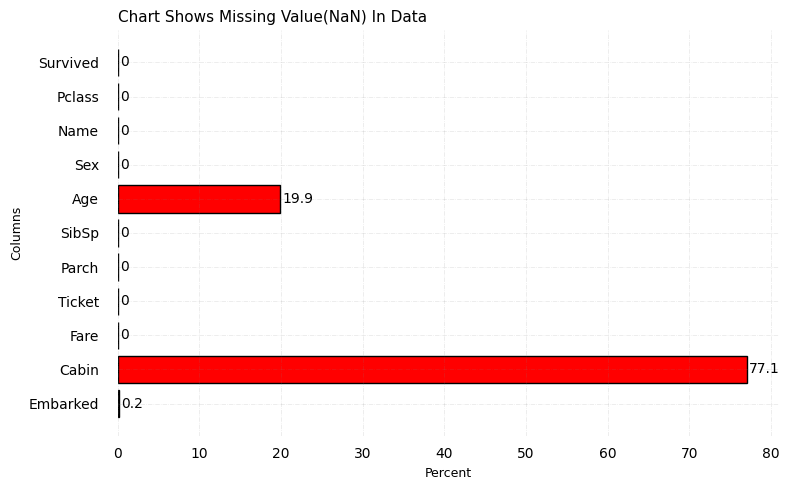

In [19]:
# Check missing values in full train data
analyize_miss(train_df)

**Test Dataset**

,Columns,TotalNaN,Percent
0,Pclass,0,0.000
1,Name,0,0.000
2,Sex,0,0.000
3,Age,86,0.206
4,SibSp,0,0.000
5,Parch,0,0.000
6,Ticket,0,0.000
7,Fare,1,0.002
8,Cabin,327,0.782
9,Embarked,0,0.000


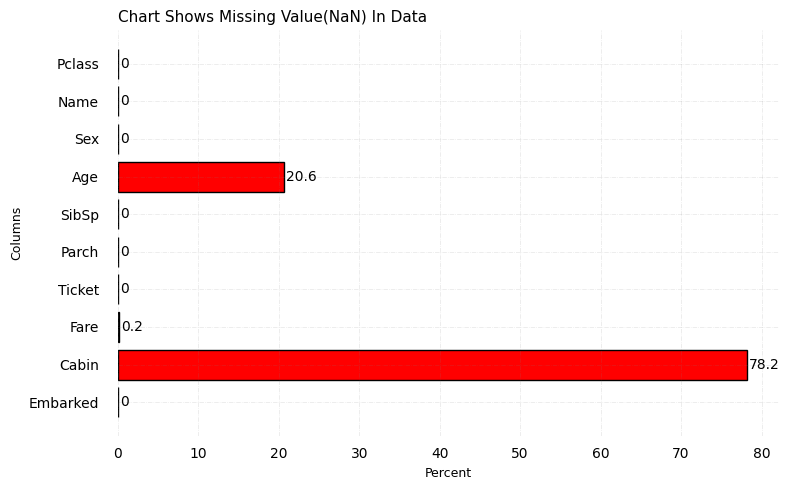

In [20]:
# Check missing values in full train data
analyize_miss(test_df)

#### **Cleaning Data**

**Age**

The dataframe of missing values and bar chart shows it clearly that 19.9% of the data is missing in age column

*Tried Some different Approach*

In [21]:
# Fill the missing values with the mean in age
train_X_mean = fill_na("Age", train_X, np.mean)
valid_X_mean = fill_na("Age", valid_X, np.mean)

# Fill the missing values with the median in age
train_X_median = fill_na("Age", train_X, train_X.Age.median())
valid_X_median = fill_na("Age", valid_X, valid_X.Age.median())

# Fill the missing values with the zero in age
train_X_zero = fill_na("Age", train_X, 0)
valid_X_zero = fill_na("Age", valid_X, 0)

# Fill the missing values with the mode in age
train_X_mode = fill_na("Age", train_X, train_X.Age.mode()[0])
valid_X_mode = fill_na("Age", valid_X, valid_X.Age.mode()[0])


# Test the mean approach
test_model("Age", train_X_mean, train_y, valid_X_mean, valid_y, "Filling with mean")

# Test the median approach
test_model("Age", train_X_median, train_y, valid_X_median, valid_y, "Filling with median")

# Test the zero approach
test_model("Age", train_X_zero, train_y, valid_X_zero, valid_y, "Filling with zero")

# Test the mode approach
test_model("Age", train_X_mode, train_y, valid_X_mode, valid_y, "Filling with mode")


Filling with mean 
train_score: 0.68 
valid score: 0.62

Filling with median 
train_score: 0.68 
valid score: 0.55

Filling with zero 
train_score: 0.68 
valid score: 0.62

Filling with mode 
train_score: 0.68 
valid score: 0.64



Filling Age missing Values with mode number.

In [22]:
train_X_cleaned = fill_na("Age", train_X, train_X.Age.mode()[0])
valid_X_cleaned = fill_na("Age", valid_X, valid_X.Age.mode()[0])
test_df_cleaned = fill_na("Age", test_df, test_df.Age.mode()[0])

In [23]:
# Check if there is any missing values in Age column.
check_nan(train_X_cleaned)

,Columns,TotalNaN,Percent
0,Pclass,0,0.000
1,Name,0,0.000
2,Sex,0,0.000
3,Age,0,0.000
4,SibSp,0,0.000
5,Parch,0,0.000
6,Ticket,0,0.000
7,Fare,0,0.000
8,Cabin,549,0.771
9,Embarked,2,0.003


In [24]:
# Check if there is any missing values in Age column.
check_nan(valid_X_cleaned)

,Columns,TotalNaN,Percent
0,Pclass,0,0.000
1,Name,0,0.000
2,Sex,0,0.000
3,Age,0,0.000
4,SibSp,0,0.000
5,Parch,0,0.000
6,Ticket,0,0.000
7,Fare,0,0.000
8,Cabin,138,0.771
9,Embarked,0,0.000


In [25]:
# Check if there is any missing values in Age column.
check_nan(test_df_cleaned)

,Columns,TotalNaN,Percent
0,Pclass,0,0.000
1,Name,0,0.000
2,Sex,0,0.000
3,Age,0,0.000
4,SibSp,0,0.000
5,Parch,0,0.000
6,Ticket,0,0.000
7,Fare,1,0.002
8,Cabin,327,0.782
9,Embarked,0,0.000


**Cabin**

From the dataframe and bar chart, it shows that Cabin has the highest percentage of missing values of 77% of data which is missing so
for now i will drop it from the data.

In [26]:
train_X_cleaned = train_X_cleaned.drop('Cabin', axis=1)
valid_X_cleaned = valid_X_cleaned.drop('Cabin', axis=1)
test_df_cleaned = test_df_cleaned.drop('Cabin', axis=1)

**Embarked**

There is some missing values of 2% in embarked in train_X data which i fill with mode.

In [27]:
train_X_cleaned = fill_na("Embarked", train_X_cleaned, train_X_cleaned.Embarked.mode()[0])

In [28]:
# Check if there is any missing values in Embarked column.
check_nan(train_X_cleaned)

,Columns,TotalNaN,Percent
0,Pclass,0,0.0
1,Name,0,0.0
2,Sex,0,0.0
3,Age,0,0.0
4,SibSp,0,0.0
5,Parch,0,0.0
6,Ticket,0,0.0
7,Fare,0,0.0
8,Embarked,0,0.0


**Fare**

Some missing value in test data in fare of 2%.

In [29]:
test_df_cleaned = fill_na("Fare", test_df_cleaned, test_df_cleaned.Fare.mode()[0])

In [30]:
# Check if there is any missing values in Fare column.
check_nan(test_df_cleaned)

,Columns,TotalNaN,Percent
0,Pclass,0,0.0
1,Name,0,0.0
2,Sex,0,0.0
3,Age,0,0.0
4,SibSp,0,0.0
5,Parch,0,0.0
6,Ticket,0,0.0
7,Fare,0,0.0
8,Embarked,0,0.0


### **Filtering Categorical columns with low unique values**

In [31]:
cleaned_columns = train_X_cleaned.columns
cleaned_columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [32]:
# list that contain categorical columns
categorical_columns = [
    col
    for col in cleaned_columns
    if train_X_cleaned[col].dtype == "object"
]

categorical_columns

['Name', 'Sex', 'Ticket', 'Embarked']

Get the columns with low unique values from the data.

In [33]:
# Drop some columns with high number of unique values.
low_unique_columns = [
    column
    for column in categorical_columns
    if len(train_X_cleaned[column].unique()) < 10
]

low_unique_columns

['Sex', 'Embarked']

Create a list of numeric columns

In [34]:
# list of numeric colummns
numeric_columns = [
    col
    for col in cleaned_columns
    if train_X_cleaned[col].dtype != "object"
]
numeric_columns

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Combine the numeric columns with the low unique values columns.

In [35]:
# Combine the lists.
numeric_cat_columns = numeric_columns + low_unique_columns
numeric_cat_columns

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

Make a data frames with these filtered columns.

In [36]:
train_X_cleaned = train_X_cleaned[numeric_cat_columns]
valid_X_cleaned = valid_X_cleaned[numeric_cat_columns]
test_df_cleaned = valid_X_cleaned[numeric_cat_columns]
train_X_cleaned.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,,,,,,,
141,3,24.0,0,2,15.2458,female,C
440,2,31.0,0,0,10.5000,male,S
818,2,31.0,1,1,37.0042,male,C
379,3,20.0,0,0,4.0125,male,C
492,3,21.0,0,0,7.2500,male,S


#### **Data Visualization For Cleaned Data**

### **Handling Categorical Feature**

Create new encode copy of the train and validation data

In [55]:
train_X_encoded = train_X_cleaned.copy()
valid_X_encoded = valid_X_cleaned.copy()

**Change Sex column to numeric.**


In [37]:

def test_encoders(column, encoder: object):
    # Make data copy.
    data_X = train_X_cleaned.copy()
    data_valid_X = valid_X_cleaned.copy()

    try:
        # Fit and transform the data.
        data_X[column] = encoder.fit_transform(data_X[column])
        data_valid_X[column] = encoder.fit_transform(data_valid_X[column])
    except ValueError:
        data_X[column] = encoder.fit_transform(data_X[[column]])
        data_valid_X[column] = encoder.fit_transform(data_valid_X[[column]])

    # Check model score for using label encode.
    return test_model(column, data_X, train_y, data_valid_X, valid_y)

In [38]:
# Test the LabelEncoder.
test_encoders('Sex', LabelEncoder())

train_score: 0.79 
valid score: 0.79



In [39]:
# Test the LabelBinarizer.
test_encoders('Sex', LabelBinarizer())

train_score: 0.79 
valid score: 0.79



In [40]:
# Test the OrdinalEncoder.
test_encoders('Sex', OrdinalEncoder())

train_score: 0.79 
valid score: 0.79



In [41]:
# Test the OrdinalEncoder.
test_encoders('Sex', OneHotEncoder(sparse_output=False))

train_score: 0.79 
valid score: 0.79



I Choosed LabelEncode.

In [42]:
# Instantiate the LabelEncode object.
label_encoder = LabelEncoder()

# Fit and transform Sex column.
train_X_cleaned['Sex'] = label_encoder.fit_transform(train_X_cleaned['Sex'])
valid_X_cleaned['Sex'] = label_encoder.fit_transform(valid_X_cleaned['Sex'])
test_df_cleaned['Sex'] = label_encoder.fit_transform(test_df_cleaned['Sex'])

print("Sex Classes: ", label_encoder.classes_)

# View the first five rows.
train_X_cleaned.head()

Sex Classes:  ['female' 'male']


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,,,,,,,
141,3,24.0,0,2,15.2458,0,C
440,2,31.0,0,0,10.5000,1,S
818,2,31.0,1,1,37.0042,1,C
379,3,20.0,0,0,4.0125,1,C
492,3,21.0,0,0,7.2500,1,S


In Sex column.
<pre>
    female changed to 0
    male changed to 1
</pre>

**Change Embarked column to numeric.**

In [43]:
# Test the LabelEncoder.
test_encoders('Embarked', LabelEncoder())

train_score: 0.63 
valid score: 0.68



In [44]:
# Test the LabelBinarizer.
test_encoders('Embarked', LabelBinarizer())

train_score: 0.63 
valid score: 0.68



In [45]:
# Test the LabelBinarizer.
test_encoders('Embarked', OrdinalEncoder())

train_score: 0.63 
valid score: 0.68



In [46]:
# Test the LabelBinarizer.
test_encoders('Embarked', OneHotEncoder(sparse_output=False))

train_score: 0.63 
valid score: 0.68



I Choosed LabelBinarizer.

In [47]:
# Instantiate the LabelEncode object.
label_binarizer = LabelBinarizer()

# Fit and transform Sex column.
train_X_cleaned['Embarked'] = label_binarizer.fit_transform(train_X_cleaned['Embarked'])
valid_X_cleaned['Embarked'] = label_binarizer.fit_transform(valid_X_cleaned['Embarked'])
test_df_cleaned['Embarked'] = label_binarizer.fit_transform(test_df_cleaned['Embarked'])

print("Embarked Classes: ", label_binarizer.classes_)

# View the first five rows.
train_X_cleaned.head()

Embarked Classes:  ['C' 'Q' 'S']


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,,,,,,,
141,3,24.0,0,2,15.2458,0,1
440,2,31.0,0,0,10.5000,1,0
818,2,31.0,1,1,37.0042,1,1
379,3,20.0,0,0,4.0125,1,1
492,3,21.0,0,0,7.2500,1,0


Embarked were changed from :-
<pre>
    S - 0
    C - 1
    Q - 2
</pre>
    

## **Data Visualization**
---

Concat the train and validation data for visualization.

In [48]:
full_train_df = pd.concat([train_X_cleaned, valid_X_cleaned], ignore_index=True)
full_train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,24.0,0,2,15.2458,0,1
1,2,31.0,0,0,10.5000,1,0
2,2,31.0,1,1,37.0042,1,1
3,3,20.0,0,0,4.0125,1,1
4,3,21.0,0,0,7.2500,1,0


## **Models Building**
---

## **Feature Engineering**
---

**Name**

Extract title from the name column

In [49]:
def extract_title(data: pd.DataFrame) -> pd.Series:
    """
    Extracts title from the name columns by searching word
    which ends with . from strings in name column.

    ## Parameters:
        data: (pd.DataFrame), Data Frame with name column.
    ## Returns:
        Series: (pd.Series), With extracted titles.
    """
    return data['Name'].str.extract("(\w+\.)")[0].str.strip()

extract_title(train_X).value_counts()

,count
0,
Mr.,419
Miss.,145
Mrs.,96
Master.,35
Rev.,3
Dr.,3
Mlle.,2
Major.,2
Col.,1


In [50]:
extract_title(valid_X).value_counts()

,count
0,
Mr.,98
Miss.,37
Mrs.,29
Master.,5
Dr.,4
Rev.,3
Don.,1
Col.,1
Jonkheer.,1


In [51]:
extract_title(test_df).value_counts()

,count
0,
Mr.,240
Miss.,78
Mrs.,72
Master.,21
Col.,2
Rev.,2
Ms.,1
Dr.,1
Dona.,1


In [52]:
def combine_title(data: pd.DataFrame) -> pd.Series:

    # Extracted titles
    titles = extract_title(data=data)

    # A list to store combined title.
    combined_title_list = []

    for sex, title in zip(data['Sex'], titles):
        if title == "Mlle.":
            combined_title_list.append("Miss.")
        elif title == "Major.":
            combined_title_list.append("Miss.")
        elif title == "Mme.":
            combined_title_list.append("Mrs.")
        elif title == "Countess.":
            combined_title_list.append("Miss.")
        elif title == "Sir.":
            combined_title_list.append("Mr.")
        elif title == "Don.":
            combined_title_list.append("Master.")
        elif title == "Lady.":
            combined_title_list.append("Miss.")
        elif title == "Dona.":
            combined_title_list.append("Mrs.")
        elif title == "Capt.":
            if sex == "male":
                combined_title_list.append("Mr.")
            else:
                combined_title_list.append("Miss.")
        elif title == "Col.":
            if sex == "male":
                combined_title_list.append("Mr.")
            else:
                combined_title_list.append("Miss.")
        elif title == "Jonkheer.":
            if sex == "male":
                combined_title_list.append("Master.")
            else:
                combined_title_list.append("Miss.")
        elif title == "Ms.":
            combined_title_list.append("Miss.")
        else:
            combined_title_list.append(title)

    return pd.Series(combined_title_list)

combine_title(train_X).value_counts()



,count
Mr.,422
Miss.,152
Mrs.,97
Master.,35
Rev.,3
Dr.,3


In [53]:
combine_title(valid_X).value_counts()

,count
Mr.,99
Miss.,37
Mrs.,29
Master.,7
Dr.,4
Rev.,3


In [54]:
combine_title(test_df).value_counts()

,count
Mr.,242
Miss.,79
Mrs.,73
Master.,21
Rev.,2
Dr.,1
